In [1]:
#IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#READ IN DATA, SHOW FIRST 4 ROWS

df = pd.read_csv("./seasonStats3.csv")
df.head()

Unnamed: 0  X  Season  TeamID  GamesWon  HighDay   AVGScore     AVGFGM  \
0           2  1    2003    1104        17        1  69.285714  24.035714   
1           3  2    2004    1104        17        4  72.206897  24.896552   
2           4  3    2005    1104        23        1  75.433333  25.366667   
3           5  4    2006    1104        17        2  69.965517  24.517241   
4           6  5    2007    1104        20       -1  73.612903  26.225806   

      AVGFGA   AVGFGM3  ...     RATOR     RATDR    RATAst     RATTO    RATStl  \
0  57.178571  6.357143  ...  1.245902  1.056782  1.036697  0.958763  1.193548   
1  55.000000  7.137931  ...  0.982036  1.085803  1.045593  0.987179  1.289655   
2  52.666667  7.633333  ...  0.887283  1.308072  1.121622  1.091954  0.891429   
3  54.068966  5.517241  ...  1.025424  1.195286  0.910026  1.149560  0.943590   
4  57.290323  6.451613  ...  0.981043  1.205521  0.916667  1.142857  0.772321   

     RATBlk     RATPF    RATFGP   RATFGP3    RATFTP  
0  1.191011  0.936920  1.003445  0.964029  1.002208  
1  0.909091  0.909402  1.087736  1.099131  0.999461  
2  2.111111  0.741611  1.190457  1.088705  1.128698  
3  1.158730  0.746741  1.080854  0.956370  1.027829  
4  1.314516  0.779174  1.099563  1.203124  1.029724  

[5 rows x 51 columns]

In [3]:
#PERFORM PCA, PRINT LOADING COMPONENTS

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from random import randint

df = df.loc[(df['Season'] >= 2003) & (df['Season'] <= 2023) & (df["HighDay"] >= -1) & (df["TeamID"] > 0)]
#df = df.loc[(df['Season'] == 2004) & (df["HighDay"] >= -1) & (df["TeamID"] > 0)] 
df = df[df["AVGFGA"] != -1]

#statsToMeasure = ["Score", "FGM", "FGA", "FGM3", "FGA3", "FTM", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"]
statsToMeasure = ["FGM", "FGA", "FGM3", "FGA3", "FTM", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"]
statsMeasured = ["RAT" + stat for stat in statsToMeasure]

x = df.loc[:, statsMeasured].values
y = df.loc[:,['GamesWon']].values
y = y.ravel()

#X = StandardScaler().fit_transform(x)
X = x

In [4]:
from sklearn.feature_selection import SequentialFeatureSelector
from time import time
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Create an instance of the models
# Create instances of the models for training
models = [
    LinearRegression(),
    LassoCV(),
    RidgeCV(),
    ElasticNetCV()
]

# Keep track of model names for later use
modelNames = [
    "LinearRegression",
    "LassoCV",
    "RidgeCV",
    "ElasticNetCV"
]


In [5]:
# Create an array to hold RMSE errors
errors = np.zeros(len(models))


# Train the models
for i, model in enumerate(models):
    model.fit(X, y)
    winPrediction = model.predict(X)
    errors[i] = mean_squared_error(y_true = y,
                                   y_pred= winPrediction,
                                   squared=False)    


print(errors)

[2.30041565 2.30320958 2.30070251 2.33527635]


In [10]:


feature_names = np.array(statsMeasured)

output = np.empty((48,3), dtype=np.dtype(('U', 100)))


for n in range(12):
    print('\nFeatures to select = ' + str(n+1))
    for i in range(4):
        #Get new model
        model = models[i]
        
        #Perform features selection
        sfs_forward = SequentialFeatureSelector(
            model, n_features_to_select=n+1, direction="forward"
        ).fit(X, y)

        #sfs_backward = SequentialFeatureSelector(
            #model, n_features_to_select=n+1, direction="backward"
        #).fit(X, y)
        
        #Get feature selection results, feed into model
        statsMeasured2 = feature_names[sfs_forward.get_support()]
        x2 = df.loc[:, statsMeasured2].values
        #X2= StandardScaler().fit_transform(x2)
        X2 = x2
        model.fit(X2, y)
        reg_pred = model.predict(X2)
                  
        #Output mean squared error, and features selected
        output[12*(i) + n,0] = modelNames[i]
        output[12*(i) + n,1] = mean_squared_error(reg_pred, y)
        output[12*(i) + n,2] = 'F: ' + ' '.join([str(elem) for elem in feature_names[sfs_forward.get_support()]])

print(output)


Features to select = 1

Features to select = 2

Features to select = 3

Features to select = 4

Features to select = 5

Features to select = 6

Features to select = 7

Features to select = 8

Features to select = 9

Features to select = 10

Features to select = 11

Features to select = 12
[['LinearRegression' '13.391196492797043' 'F: RATFGM']
 ['LinearRegression' '6.990138194391827' 'F: RATFGM RATFTM']
 ['LinearRegression' '5.4829150355751075' 'F: RATFGM RATFGM3 RATFTM']
 ['LinearRegression' '5.465014489001674'
  'F: RATFGM RATFGA RATFGM3 RATFTM']
 ['LinearRegression' '5.409978602096623'
  'F: RATFGM RATFGA RATFGM3 RATFTM RATTO']
 ['LinearRegression' '5.338158530768146'
  'F: RATFGM RATFGA RATFGM3 RATFTM RATOR RATTO']
 ['LinearRegression' '5.31195457296782'
  'F: RATFGM RATFGA RATFGM3 RATFTM RATOR RATDR RATTO']
 ['LinearRegression' '5.301848214935383'
  'F: RATFGM RATFGA RATFGM3 RATFTM RATOR RATDR RATTO RATBlk']
 ['LinearRegression' '5.298044019522571'
  'F: RATFGM RATFGA RATFGM3 RATF

In [11]:
df2 = pd.DataFrame(output, columns = ['RegressionModel','MSE','FeaturesUsed'])

df2.to_csv('Feature-Selection-Results-New/RegFeatSelecStatsFIXED2.csv')

In [12]:
outputMSE = [0]*48
for i in range(48):
    outputMSE[i] = float(output[i,1])

print(outputMSE)

[13.391196492797043, 6.990138194391827, 5.4829150355751075, 5.465014489001674, 5.409978602096623, 5.338158530768146, 5.31195457296782, 5.301848214935383, 5.298044019522571, 5.297856082865381, 5.296640511541174, 5.294884937890194, 13.39122125397578, 6.990455253461544, 5.483201188403771, 5.465409519430448, 5.410685976616654, 5.341682160116471, 5.3158075313733315, 5.311338965758726, 5.305350695556457, 5.305383930818605, 5.303423683497094, 5.307604120694506, 13.391238644036397, 6.9901720840837225, 5.482945197357764, 5.465062448443893, 5.4100422322429, 5.338602452251121, 5.312634796150411, 5.3024929504100395, 5.298690717665293, 5.298582433505468, 5.298056306947677, 5.296277740659144, 13.44626740655189, 7.071649536496766, 5.55491277222931, 5.536554424388784, 5.529742551313858, 5.523450998887072, 5.407538072026345, 5.401557900533908, 5.391232082758255, 5.391229116409102, 5.391049339759851, 5.4091021905961805]


Text(0, 0.5, 'MSE')

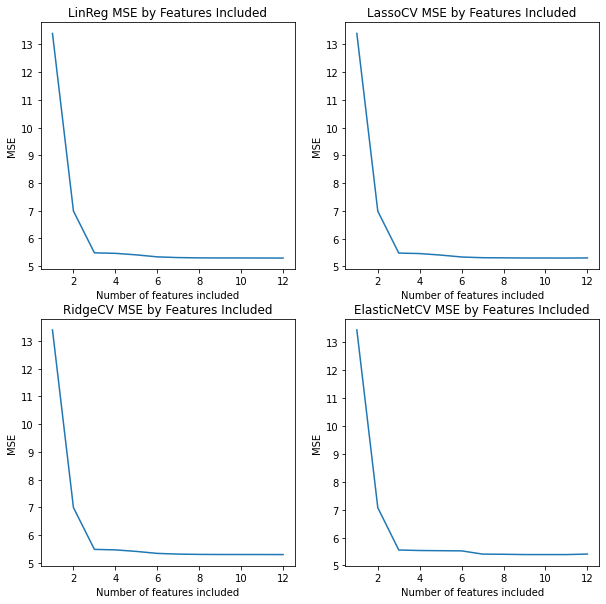

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0,0].plot(np.arange(12) + 1, outputMSE[0:12])
axs[0,0].set_title('LinReg MSE by Features Included')
axs[0,0].set_xlabel('Number of features included')
axs[0,0].set_ylabel('MSE')
axs[1,0].plot(np.arange(12) + 1, outputMSE[24:36])
axs[1,0].set_title('RidgeCV MSE by Features Included')
axs[1,0].set_xlabel('Number of features included')
axs[1,0].set_ylabel('MSE')
axs[1,1].plot(np.arange(12) + 1, outputMSE[36:48])
axs[1,1].set_title('ElasticNetCV MSE by Features Included')
axs[1,1].set_xlabel('Number of features included')
axs[1,1].set_ylabel('MSE')
axs[0,1].plot(np.arange(12) + 1, outputMSE[12:24])
axs[0,1].set_title('LassoCV MSE by Features Included')
axs[0,1].set_xlabel('Number of features included')
axs[0,1].set_ylabel('MSE')